# Time Series Forecasting With LSTM

In [1]:
import numpy 
import matplotlib.pyplot as plt
import pandas 
import math 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)

## Loading the data 

We will use a airline passenger tracking dataset.

In [2]:
from google.colab import files 
data_to_load = files.upload()

Saving airline-passengers.csv to airline-passengers (1).csv


In [3]:
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')

#normalize the data
scaler = MinMaxScaler(feature_range=(0,1))

dataset = scaler.fit_transform(dataset)

### Splitting the data into train and test set

In [6]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]
print(len(train),len(test))

96 48


In [8]:
print(train)

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

## Data Preprocessing

We will make a helper function that will shape the data for modeliing.

In [9]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i+look_back,0])
  return numpy.array(dataX), numpy.array(dataY)

#reshaping before aplyting LSTM , reshaping into X=t, Y = t+1

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



### Reshaping

We have to reshape the input to be samples, time steps and features.

In [11]:
trainX = numpy.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0],1,testX.shape[1]))

In [13]:
print(testX)

[[[0.4073359 ]]

 [[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]

 [[0.484556  ]]

 [[0.6138996 ]]

 [[0.6969112 ]]

 [[0.70077217]]

 [[0.57915056]]

 [[0.46911195]]

 [[0.38803086]]

 [[0.44787642]]

 [[0.45559844]]

 [[0.4131274 ]]

 [[0.4980695 ]]

 [[0.47104248]]

 [[0.49999997]]

 [[0.6389961 ]]

 [[0.7471043 ]]

 [[0.7741313 ]]

 [[0.57915056]]

 [[0.492278  ]]

 [[0.3976834 ]]

 [[0.44980696]]

 [[0.49420848]]

 [[0.45945945]]

 [[0.5830116 ]]

 [[0.5637065 ]]

 [[0.61003864]]

 [[0.71042466]]

 [[0.8571429 ]]

 [[0.8783784 ]]

 [[0.69305015]]

 [[0.5849421 ]]

 [[0.4980695 ]]

 [[0.58108103]]

 [[0.6042471 ]]

 [[0.554054  ]]

 [[0.60810804]]

 [[0.6891892 ]]

 [[0.71042466]]

 [[0.8320464 ]]

 [[1.        ]]

 [[0.96911204]]

 [[0.7799227 ]]

 [[0.6891892 ]]]


### LSTM Model

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape =(1,look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0356
Epoch 2/100
94/94 - 0s - loss: 0.0161
Epoch 3/100
94/94 - 0s - loss: 0.0117
Epoch 4/100
94/94 - 0s - loss: 0.0106
Epoch 5/100
94/94 - 0s - loss: 0.0097
Epoch 6/100
94/94 - 0s - loss: 0.0087
Epoch 7/100
94/94 - 0s - loss: 0.0079
Epoch 8/100
94/94 - 0s - loss: 0.0071
Epoch 9/100
94/94 - 0s - loss: 0.0063
Epoch 10/100
94/94 - 0s - loss: 0.0056
Epoch 11/100
94/94 - 0s - loss: 0.0048
Epoch 12/100
94/94 - 0s - loss: 0.0043
Epoch 13/100
94/94 - 0s - loss: 0.0037
Epoch 14/100
94/94 - 0s - loss: 0.0032
Epoch 15/100
94/94 - 0s - loss: 0.0029
Epoch 16/100
94/94 - 0s - loss: 0.0026
Epoch 17/100
94/94 - 0s - loss: 0.0024
Epoch 18/100
94/94 - 0s - loss: 0.0023
Epoch 19/100
94/94 - 0s - loss: 0.0022
Epoch 20/100
94/94 - 0s - loss: 0.0022
Epoch 21/100
94/94 - 0s - loss: 0.0021
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

##Prediction TIme

Finally we will predict the data with our model and visualize it.

In [15]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict) #inverse_transform converts the data into original form = without scaling 
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])



In [19]:
print(trainY[0])

[117.99999916 131.99999879 129.00000163 120.99999632 135.00000368
 147.99999397 147.99999397 136.00000531 119.00000078 103.99999952
 117.99999916 115.00000199 125.99999674 140.99999801 135.00000368
 125.00000283 148.9999956  169.99999891 169.99999891 157.99999481
 133.00000042 114.00000036 139.99999638 145.00000452 149.99999723
 177.9999965  163.00000295 172.00000217 177.9999965  198.99999982
 198.99999982 184.00000627 162.00000133 146.00000615 165.9999924
 171.00000054 179.99999976 193.00000549 181.00000139 183.00000464
 217.99999988 230.00000398 241.99999264 209.00000066 191.00000223
 172.00000217 194.00000712 195.99999493 195.99999493 235.99999831
 234.99999668 229.00000235 242.99999427 263.99999759 272.00001061
 236.99999994 211.00000392 179.99999976 201.00000308 203.99999252
 187.99999735 234.99999668 226.9999991  233.99999506 263.99999759
 301.99999771 292.99999849 259.00000488 229.00000235 203.00000633
 229.00000235 241.99999264 232.99999343 266.99998703 268.99999029
 270.000007

In [21]:
print(trainPredict[:,0])

[122.886894 128.07146  140.36282  137.70694  130.68289  143.03026
 154.71616  154.71616  143.9219   128.94054  116.05638  128.07146
 125.47272  135.06284  148.39868  143.03026  134.18414  155.62323
 174.91472  174.91472  163.83607  141.25069  124.60932  147.5009
 152.0017   156.53143  182.37396  168.43521  176.77432  182.37396
 202.19077  202.19077  188.00319  167.5134   152.90538  171.20648
 175.84406  184.2472   196.49753  185.18501  187.06303  220.35124
 231.90022  243.48903  211.72646  194.60498  176.77432  197.4448
 199.34128  199.34128  237.69073  236.72507  230.93602  244.45602
 264.7807   272.52124  238.65666  213.63988  184.2472   204.09343
 206.95175  191.77132  236.72507  229.00854  235.75958  264.7807
 301.43307  292.78674  259.9406   230.93602  205.99844  230.93602
 243.48903  234.79437  267.68414  269.61932  270.58676  313.86377
 359.82855  344.06897  311.00204  274.45523  238.65666  278.32117
 284.11423  277.35495  315.76907  311.95645  316.72095  368.9896
 403.83978  39

In [22]:
#calculate rmse

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print(trainScore,testScore)


22.79703177487341 48.056470328729986


### Plotting the predictions

In [23]:
trainPredictPlot = numpy.empty_like(dataset) # creating a same dataset like array 
trainPredictPlot[:,:] = numpy.nan # filling out with zeroes

trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict


#shifting the test predictions for plotting 

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict




# New Section

### Just cheking 

In [24]:
trainPredict

array([[122.886894],
       [128.07146 ],
       [140.36282 ],
       [137.70694 ],
       [130.68289 ],
       [143.03026 ],
       [154.71616 ],
       [154.71616 ],
       [143.9219  ],
       [128.94054 ],
       [116.05638 ],
       [128.07146 ],
       [125.47272 ],
       [135.06284 ],
       [148.39868 ],
       [143.03026 ],
       [134.18414 ],
       [155.62323 ],
       [174.91472 ],
       [174.91472 ],
       [163.83607 ],
       [141.25069 ],
       [124.60932 ],
       [147.5009  ],
       [152.0017  ],
       [156.53143 ],
       [182.37396 ],
       [168.43521 ],
       [176.77432 ],
       [182.37396 ],
       [202.19077 ],
       [202.19077 ],
       [188.00319 ],
       [167.5134  ],
       [152.90538 ],
       [171.20648 ],
       [175.84406 ],
       [184.2472  ],
       [196.49753 ],
       [185.18501 ],
       [187.06303 ],
       [220.35124 ],
       [231.90022 ],
       [243.48903 ],
       [211.72646 ],
       [194.60498 ],
       [176.77432 ],
       [197.4

In [25]:
testPredict

array([[313.86377],
       [300.47388],
       [352.44022],
       [345.00208],
       [351.5131 ],
       [411.6661 ],
       [447.83307],
       [449.46402],
       [395.92938],
       [344.06897],
       [304.3083 ],
       [333.75848],
       [337.51736],
       [316.72095],
       [357.9863 ],
       [345.00208],
       [358.90778],
       [422.81763],
       [468.6702 ],
       [479.5581 ],
       [395.92938],
       [355.21686],
       [309.0918 ],
       [334.69922],
       [356.14075],
       [339.39273],
       [397.69446],
       [388.82944],
       [409.93433],
       [453.52115],
       [511.53183],
       [519.3562 ],
       [446.1973 ],
       [398.57538],
       [357.9863 ],
       [396.8124 ],
       [407.3287 ],
       [384.3602 ],
       [409.06677],
       [444.5571 ],
       [453.52115],
       [502.0989 ],
       [561.44714],
       [551.1887 ],
       [481.86072],
       [444.5571 ]], dtype=float32)

In [26]:
trainPredictPlot

array([[       nan],
       [122.886894],
       [128.07146 ],
       [140.36282 ],
       [137.70694 ],
       [130.68289 ],
       [143.03026 ],
       [154.71616 ],
       [154.71616 ],
       [143.9219  ],
       [128.94054 ],
       [116.05638 ],
       [128.07146 ],
       [125.47272 ],
       [135.06284 ],
       [148.39868 ],
       [143.03026 ],
       [134.18414 ],
       [155.62323 ],
       [174.91472 ],
       [174.91472 ],
       [163.83607 ],
       [141.25069 ],
       [124.60932 ],
       [147.5009  ],
       [152.0017  ],
       [156.53143 ],
       [182.37396 ],
       [168.43521 ],
       [176.77432 ],
       [182.37396 ],
       [202.19077 ],
       [202.19077 ],
       [188.00319 ],
       [167.5134  ],
       [152.90538 ],
       [171.20648 ],
       [175.84406 ],
       [184.2472  ],
       [196.49753 ],
       [185.18501 ],
       [187.06303 ],
       [220.35124 ],
       [231.90022 ],
       [243.48903 ],
       [211.72646 ],
       [194.60498 ],
       [176.7

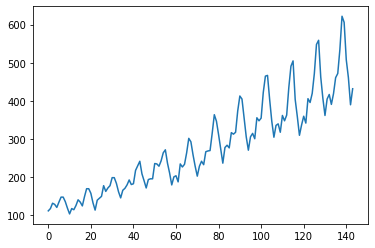

In [30]:
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()

## The next plots will show how beautifully accurate our prediction is.

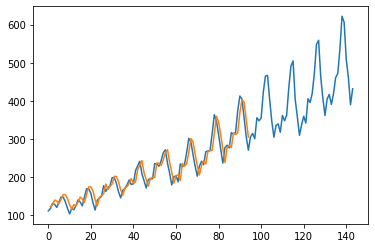

In [33]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()

The above plot shows how our train predictons came so close with the original dataset

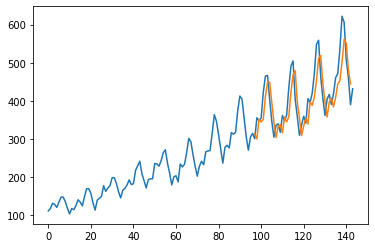

In [34]:
# see the test prediction accuracy !
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()